# Exercício Hart Disease Prediction
Aluno: João Paulo Barbosa

Neste exercício nossa tarefa é criar um modelo preditivo utilizando ML, capaz de prever de forma binária se um determinado indivíduo terá ou não problemas cardíacos como doenças coronárias (CHD) ou infarte do miocárdio.

Observamos que este é um modelo de aprendizagem supervisionada, onde utilzaremos técnicas de classificação binária, já que a variável target é categórica e binária.

# Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


# Importação do dataset

In [ ]:
#importando o dataset
from google.colab import files
uploaded = files.upload()

Saving heart_disease_data.csv to heart_disease_data.csv


In [ ]:
df = pd.read_csv("heart_disease_data.csv")

# Análise preliminar do dataset

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,No,MT
1,No,20.34,No,NaN,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,NaN,VT
2,No,26.58,Yes,NaN,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,NaN,WY
3,No,24.21,No,NaN,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,No,VT
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,NaN,DC


In [ ]:
#lendo as características do dataset
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.327367,3.37171,3.898366,7.097075
std,6.369381,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.440000,2.00000,3.000000,8.000000
max,119.000000,30.00000,30.000000,24.000000


In [ ]:
df.describe(include=['object']).T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,212984,2,No,191207
Stroke,318683,2,No,306614
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,14,65-69,34143
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


In [ ]:
# Identificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HeartDisease                319795 non-null  object 
 1   BMI                         319795 non-null  float64
 2   Smoking                     319795 non-null  object 
 3   AlcoholDrinking             212984 non-null  object 
 4   Stroke                      318683 non-null  object 
 5   PhysicalHealth              319795 non-null  float64
 6   MentalHealth                319795 non-null  float64
 7   DiffWalking                 319795 non-null  object 
 8   Sex                         319795 non-null  object 
 9   AgeCategory                 319795 non-null  object 
 10  Race                        319795 non-null  object 
 11  Diabetic                    319795 non-null  object 
 12  PhysicalActivity            319795 non-null  object 
 13  GenHealth     

In [ ]:
# Identificando a presença de dados nulos (null)
df.select_dtypes(include=['object']).isnull().sum()

HeartDisease                       0
Smoking                            0
AlcoholDrinking               106811
Stroke                          1112
DiffWalking                        0
Sex                                0
AgeCategory                        0
Race                               0
Diabetic                           0
PhysicalActivity                   0
GenHealth                          0
Asthma                             0
KidneyDisease                      0
SkinCancer                       349
HeartDisease_FamilyHistory    284532
State                              0
dtype: int64

In [ ]:
# Identificando a quantidade de categorias em cada variável
df.nunique()

HeartDisease                     2
BMI                           3609
Smoking                          2
AlcoholDrinking                  2
Stroke                           2
PhysicalHealth                  31
MentalHealth                    31
DiffWalking                      2
Sex                              2
AgeCategory                     14
Race                             6
Diabetic                         4
PhysicalActivity                 2
GenHealth                        5
SleepTime                       24
Asthma                           2
KidneyDisease                    2
SkinCancer                       2
HeartDisease_FamilyHistory       2
State                           51
dtype: int64

Foram identificadas variáveis categóricas com valores nulos, vamos analisar o tratamento destes valores nulos.

São elas:

AlcoholDrinking

Stroke

SkinCancer

HeartDisease_FamilyHistory

 Também foram identificadas variáveis categóricas com mais de dois valores únicos, teremos de fazer o encoding destas variáveis posteriormente.

# Análise exploratória dos dados, tratamento de variáveis categóricas e tratamento dos valores nulos

In [ ]:
#Substituindo os valores "sim" e "não" por valores numéricos.
#Este é um passo importante para que posteriormente possamos utilizar os modelos de ML para criação dos algoritmos de predição.
df =  df[df.columns].replace({'Yes':1, 'No':0})

In [ ]:
# Identificando os tipos de categorias restantes nas variáveis categóricas, que ainda não foram transformadas em valores numéricos.
categorical_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease_FamilyHistory', 'State']
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Valores únicos em {column}:")
    print(unique_values)
    print()

Valores únicos em HeartDisease:
[0 1]

Valores únicos em Smoking:
[1 0]

Valores únicos em AlcoholDrinking:
[ 0. nan  1.]

Valores únicos em Stroke:
[ 0.  1. nan]

Valores únicos em DiffWalking:
[0 1]

Valores únicos em Sex:
['Female' 'Male']

Valores únicos em AgeCategory:
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29' '0']

Valores únicos em Race:
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']

Valores únicos em Diabetic:
[1 0 'No, borderline diabetes' 'Yes (during pregnancy)']

Valores únicos em PhysicalActivity:
[1 0]

Valores únicos em GenHealth:
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']

Valores únicos em Asthma:
[1 0]

Valores únicos em KidneyDisease:
[0 1]

Valores únicos em SkinCancer:
[ 1.  0. nan]

Valores únicos em HeartDisease_FamilyHistory:
[ 0. nan  1.]

Valores únicos em State:
['MT' 'VT' 'WY' 'DC' 'PA' 'AK' 'KY' 'DE' 'CA' 'NM' 'WI' 'VA' 'IN' 'IL'
 'OR' 'MS' 'FL' 'OK' '

<Axes: xlabel='HeartDisease', ylabel='count'>

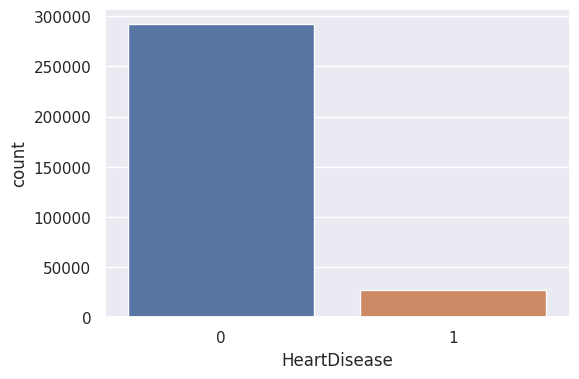

In [ ]:
#Analisando a distribuição da variável target
fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(data=df, x='HeartDisease')

Observamos que o dataset não possui uma distribuição balanceada da variável target, já que a grande maioria das observações são de pessoas saudáveis. Veremos adiante que este é um fator que dificulta a qualidade da previsão do modelo, devido ao baixo volume de valores positivos da variávei target, o que dificulta medir sua relação com as demais variáveis.

Text(0, 0.5, 'Frequency')

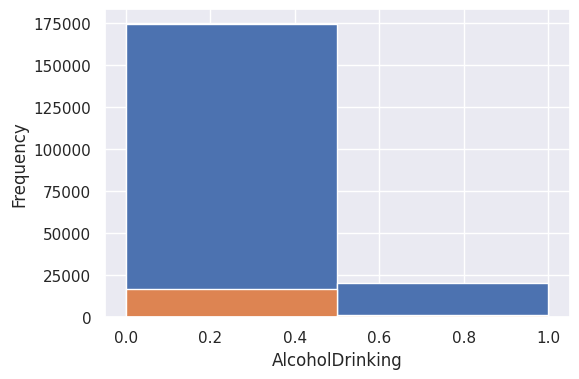

In [ ]:
#Análise da variável AlcoholDrinking
fig, ax = plt.subplots(figsize = (6,4))

ax.hist(df[df["HeartDisease"]== 0]["AlcoholDrinking"], bins=2, label="No HeartDisease")
ax.hist(df[df["HeartDisease"]== 1]["AlcoholDrinking"], bins=2, label="HeartDisease")

ax.set_xlabel("AlcoholDrinking")
ax.set_ylabel("Frequency")

In [ ]:
AlcoholDrinking_and_heart_disease = len(df[(df['HeartDisease']==1) & (df['AlcoholDrinking']==1)])
num_AlcoholDrinking = len(df[df['AlcoholDrinking']==1])
no_AlcoholDrinking_and_heart_disease = len(df[(df['HeartDisease']==1) & (df['AlcoholDrinking']==0)])
num_no_AlcoholDrinking = len(df[df['AlcoholDrinking']==0])
print('Probability of Heart disease if you drink alcohol:', AlcoholDrinking_and_heart_disease/num_AlcoholDrinking)
print("Probability of Heart disease if you don't drink alcohol:", no_AlcoholDrinking_and_heart_disease/num_no_AlcoholDrinking)

Probability of Heart disease if you drink alcohol: 0.05239472838315654
Probability of Heart disease if you don't drink alcohol: 0.08819760782816528


Percebe-se que a variável AlcoholDrinking aparentemente agrega valor ao modelo porque a quantidade de observações de pessoas que bebem alcool é pequena em relação ao total de observações e não existem diferenças significativas entre a porcentagem de pessoas que possuem problemas cardiácos em relação ás pessoas que tomam alccol ou não tomam alcool.

Considerando que esta variável possui um alto volume de valores nulos (106811 - 33,3% do total de observações), se substituirmos estes valores por utros como a moda, ou criarmos uma terceira categoria, poderemos descaracterizar seu comportamento em relação à variável alvo. Portanto optamos por excluir esta variável

In [ ]:
df.drop('AlcoholDrinking', axis=1, inplace=True)

Text(0, 0.5, 'Frequency')

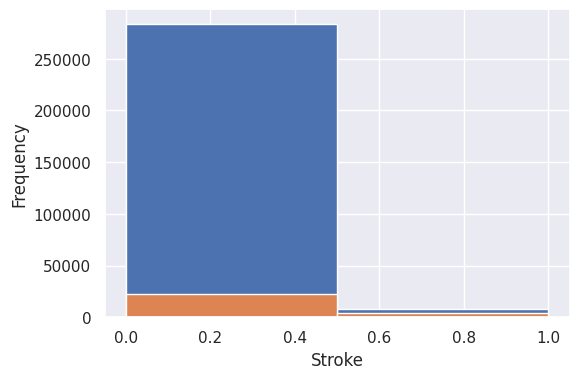

In [ ]:
#Análise da variável Stroke
fig, ax = plt.subplots(figsize = (6,4))

ax.hist(df[df["HeartDisease"]== 0]["Stroke"], bins=2, label="No HeartDisease")
ax.hist(df[df["HeartDisease"]== 1]["Stroke"], bins=2, label="HeartDisease")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")


In [ ]:
Stroke_and_heart_disease = len(df[(df['HeartDisease']==1) & (df['Stroke']==1)])
num_Stroke = len(df[df['Stroke']==1])
no_Stroke_and_heart_disease = len(df[(df['HeartDisease']==1) & (df['Stroke']==0)])
num_no_Stroke = len(df[df['Stroke']==0])
print('Probability of Heart disease if you had a stroke:', Stroke_and_heart_disease/num_Stroke)
print("Probability of Heart disease if you didn`t have a stroke:", no_Stroke_and_heart_disease/num_no_Stroke)

Probability of Heart disease if you had a stroke: 0.3636589609743972
Probability of Heart disease if you didn`t have a stroke: 0.07470630825728766


Neste caso, apesar da amostra de pessoas que tiveram AVC ser pequena, existe uma alta representatividade (36,6%) de pessoas que tiveram problemas cardíacos dentro deste grupo, portanto iremos manter a variável e preencher os valores nulos com a moda (0).

In [ ]:
df['Stroke'].fillna(0, inplace=True)

Text(0, 0.5, 'Frequency')

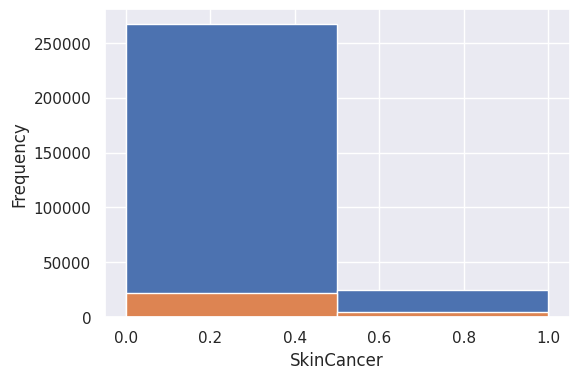

In [ ]:
#Análise da variável SkinCancer
fig, ax = plt.subplots(figsize = (6,4))

ax.hist(df[df["HeartDisease"]== 0]["SkinCancer"], bins=2, label="No HeartDisease")
ax.hist(df[df["HeartDisease"]== 1]["SkinCancer"], bins=2, label="HeartDisease")

ax.set_xlabel("SkinCancer")
ax.set_ylabel("Frequency")


In [ ]:
SkinCancer_and_heart_disease = len(df[(df['HeartDisease']==1) & (df['SkinCancer']==1)])
num_SkinCancer = len(df[df['SkinCancer']==1])
no_SkinCancer_and_heart_disease = len(df[(df['HeartDisease']==1) & (df['SkinCancer']==0)])
num_no_SkinCancer = len(df[df['SkinCancer']==0])
print('Probability of Heart disease if you had a SkinCancer:', SkinCancer_and_heart_disease/num_SkinCancer)
print("Probability of Heart disease if you didn`t have a SkinCancer:", no_SkinCancer_and_heart_disease/num_no_SkinCancer)

Probability of Heart disease if you had a SkinCancer: 0.16700761259599584
Probability of Heart disease if you didn`t have a SkinCancer: 0.07720619969823256


Neste caso a variável parece relevante para o modelo, já que a porcentagem de pessoas que tiveram câncer de pele e problemas cardíacos é acima do dobro das pessoas que não tiveram câncer de pele. Considerando também que a quantidade de valores nulos é baixa, iremos preenchê-los com a moda (0).

In [ ]:
df['SkinCancer'].fillna(0, inplace=True)

Text(0, 0.5, 'Frequency')

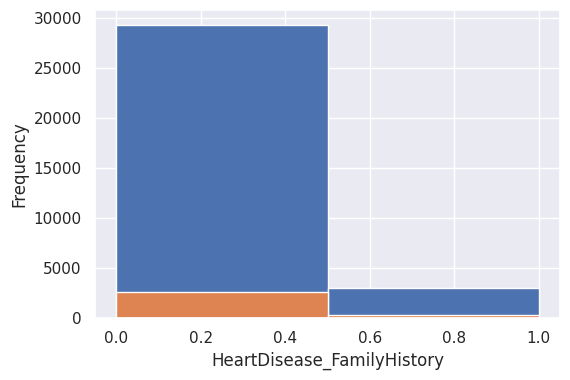

In [ ]:
# Análise da variável HeartDisease_FamilyHistory
fig, ax = plt.subplots(figsize = (6,4))

ax.hist(df[df["HeartDisease"]== 0]["HeartDisease_FamilyHistory"], bins=2, label="No HeartDisease")
ax.hist(df[df["HeartDisease"]== 1]["HeartDisease_FamilyHistory"], bins=2, label="HeartDisease")

ax.set_xlabel("HeartDisease_FamilyHistory")
ax.set_ylabel("Frequency")


In [ ]:
HeartDisease_FamilyHistory_and_heart_disease = len(df[(df['HeartDisease']==1) & (df['HeartDisease_FamilyHistory']==1)])
num_HeartDisease_FamilyHistory = len(df[df['HeartDisease_FamilyHistory']==1])
no_HeartDisease_FamilyHistory_and_heart_disease = len(df[(df['HeartDisease']==1) & (df['HeartDisease_FamilyHistory']==0)])
num_no_HeartDisease_FamilyHistory = len(df[df['HeartDisease_FamilyHistory']==0])
print('Probability of Heart disease if you had a HeartDisease_FamilyHistory:', HeartDisease_FamilyHistory_and_heart_disease/num_HeartDisease_FamilyHistory)
print("Probability of Heart disease if you didn`t have a HeartDisease_FamilyHistory:", no_HeartDisease_FamilyHistory_and_heart_disease/num_no_HeartDisease_FamilyHistory)

Probability of Heart disease if you had a HeartDisease_FamilyHistory: 0.08878648233486944
Probability of Heart disease if you didn`t have a HeartDisease_FamilyHistory: 0.08272931767058235


Neste caso o número de valores nulos é muito alto em relação ao total de observações e também não se identifica alteração significativa na porcentagem de pessoas que tiveram problemas cardíacos, considerando a ocorrência de histórico de problemas cardíacos na família. Portanto iremos excluir a variável

In [ ]:
df.drop('HeartDisease_FamilyHistory', axis=1, inplace=True)

In [ ]:
#Verificação da ocorrência de valores nulos após o tratamento
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   Stroke            319795 non-null  float64
 4   PhysicalHealth    319795 non-null  float64
 5   MentalHealth      319795 non-null  float64
 6   DiffWalking       319795 non-null  int64  
 7   Sex               319795 non-null  object 
 8   AgeCategory       319795 non-null  object 
 9   Race              319795 non-null  object 
 10  Diabetic          319795 non-null  object 
 11  PhysicalActivity  319795 non-null  int64  
 12  GenHealth         319795 non-null  object 
 13  SleepTime         319795 non-null  float64
 14  Asthma            319795 non-null  int64  
 15  KidneyDisease     319795 non-null  int64  
 16  SkinCancer        31

Continuando a análise exploratória das variáveis categóricas

Text(0, 0.5, 'Frequency')

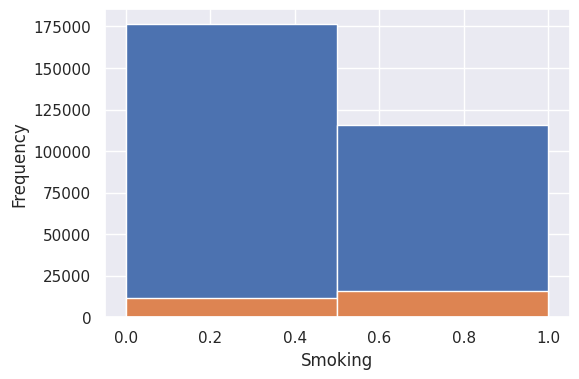

In [ ]:
# Análise da variável Smoking
fig, ax = plt.subplots(figsize = (6,4))

ax.hist(df[df["HeartDisease"]==0]["Smoking"], bins=2, label="No HeartDisease")
ax.hist(df[df["HeartDisease"]==1]["Smoking"], bins=2, label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")


In [ ]:
smoke_and_heart_disease = len(df[(df['HeartDisease']==1) & (df['Smoking']==1)])
num_smoke = len(df[df['Smoking']==1])
no_smoke_and_heart_disease = len(df[(df['HeartDisease']==1) & (df['Smoking']==0)])
num_no_smoke = len(df[df['Smoking']==0])
print('Probability of Heart disease if you smoke:', smoke_and_heart_disease/num_smoke)
print("Probability of Heart disease if you don't smoke:", no_smoke_and_heart_disease/num_no_smoke)

Probability of Heart disease if you smoke: 0.12157715983867544
Probability of Heart disease if you don't smoke: 0.0603341370078824


A Probabilidade de pessoas que fumam terem doenças cardíacas é quase o dobro da probabilidade de pessoas que não fumam.


Text(0, 0.5, 'Frequency')

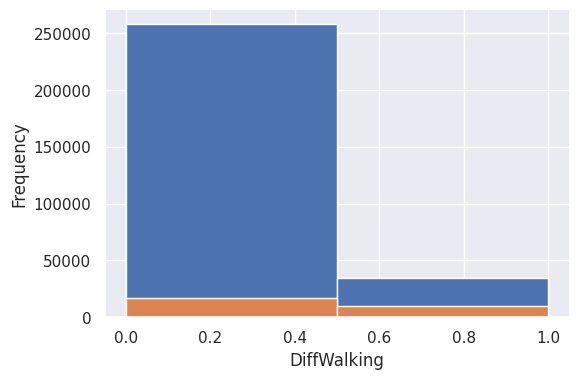

In [ ]:
# Análise da variável DiffWalking
fig, ax = plt.subplots(figsize = (6,4))

ax.hist(df[df["HeartDisease"]== 0]["DiffWalking"], bins=2, label="No HeartDisease")
ax.hist(df[df["HeartDisease"]== 1]["DiffWalking"], bins=2, label="HeartDisease")

ax.set_xlabel("DiffWalking")
ax.set_ylabel("Frequency")

In [ ]:
DiffWalking_and_heart_disease = len(df[(df['HeartDisease']== 1) & (df['DiffWalking']== 1)])
num_DiffWalking = len(df[df['DiffWalking']== 1])
no_DiffWalking_and_heart_disease = len(df[(df['HeartDisease']== 1) & (df['DiffWalking']== 0)])
num_no_DiffWalking = len(df[df['DiffWalking']== 0])
print('Probability of Heart disease if you have difficulty walking:', DiffWalking_and_heart_disease/num_DiffWalking)
print("Probability of Heart disease if you don't have difficulty walking:", no_DiffWalking_and_heart_disease/num_no_DiffWalking)

Probability of Heart disease if you have difficulty walking: 0.22580499887412744
Probability of Heart disease if you don't have difficulty walking: 0.0629845489042613


A Probabilidade de pessoas que tem dificuldade para andar terem doenças cardíacas é mais que o triplo da probabilidade de pessoas que não tem dificuldade para andar terem doenças cardíacas. Ressalva-se que a quantidade total de pessoas que tem dificuldade de andar é pequena

Text(0, 0.5, 'Frequency')

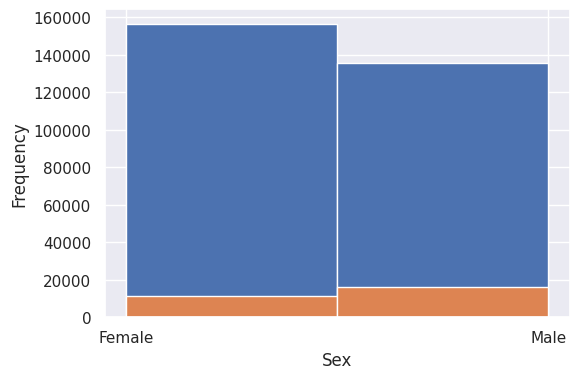

In [ ]:
# Análise da variável Sex
fig, ax = plt.subplots(figsize = (6,4))

ax.hist(df[df["HeartDisease"]== 0]["Sex"], bins=2, label="No HeartDisease")
ax.hist(df[df["HeartDisease"]== 1]["Sex"], bins=2, label="HeartDisease")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

A probabilidade de homens terem doenças cardíacas é maior do que a probabilidade de mulheres terem doenças cardíacas.

In [ ]:
#Encoding da variável Sex
df['Sex'] = df['Sex'].replace({'Female': 0, 'Male': 1})

Text(0, 0.5, 'Frequency')

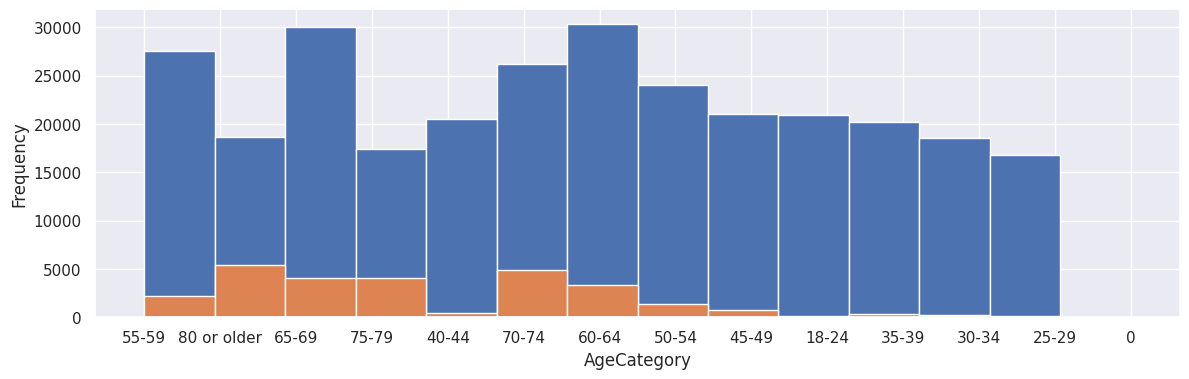

In [ ]:
#Análise da variável AgeCategory
fig, ax = plt.subplots(figsize = (14,4))

ax.hist(df[df["HeartDisease"]== 0]["AgeCategory"], bins=14, label="No HeartDisease")
ax.hist(df[df["HeartDisease"]== 1]["AgeCategory"], bins=14, label="HeartDisease")

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")


Percebe-se que pessoas com idade mais avançada (a partir de 50 anos) possuem maior probabilidade de terem problemas cardíacos.

Text(0, 0.5, 'Frequency')

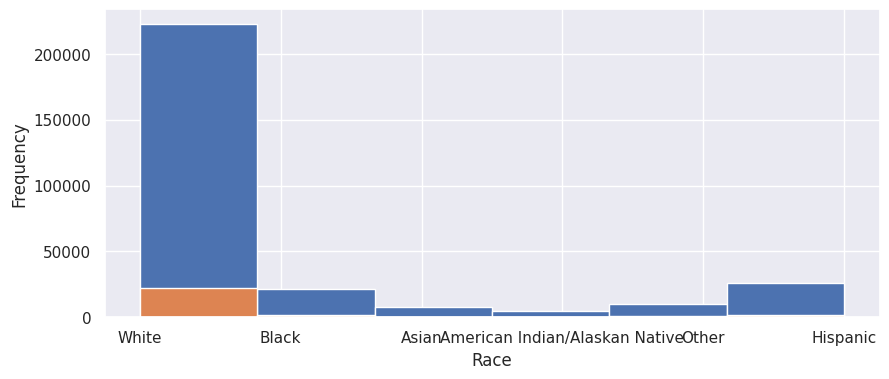

In [ ]:
# Análise da variável Race
fig, ax = plt.subplots(figsize = (10,4))

ax.hist(df[df["HeartDisease"]== 0]["Race"], bins=6, label="No HeartDisease")
ax.hist(df[df["HeartDisease"]== 1]["Race"], bins=6, label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")

Percebe-se que a maior ocorrência de problemas cardíacos é em pessoas brancas, assim como o maior volume de observações.

In [ ]:
# Análise da variável Diabetic
# Inicialmente sabemos que esta variável possui quatro categorias, vejamos sua distribuição.

value_counts = df['Diabetic'].value_counts()
percentage = (value_counts / len(df)) * 100
print(percentage)

0                          84.320580
1                          12.758799
No, borderline diabetes     2.120421
Yes (during pregnancy)      0.800200
Name: Diabetic, dtype: float64


Considerando que 97% dos dados são divididos em sim e não, iremos agrupar os demais dados dentro das categorias sim e não e transformá-los em números (0 e 1).

In [ ]:
df['Diabetic'] = df['Diabetic'].replace({'No, borderline diabetes': 0, 'Yes (during pregnancy)': 1})

In [ ]:
df['Diabetic'].unique()

array([1, 0])

Text(0, 0.5, 'Frequency')

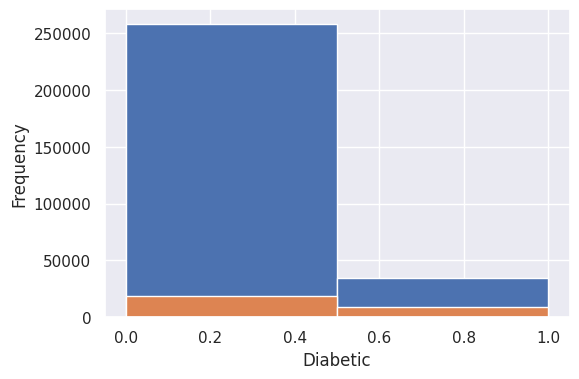

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))

ax.hist(df[df["HeartDisease"]== 0]["Diabetic"], bins=2, label="No HeartDisease")
ax.hist(df[df["HeartDisease"]== 1]["Diabetic"], bins=2, label="HeartDisease")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

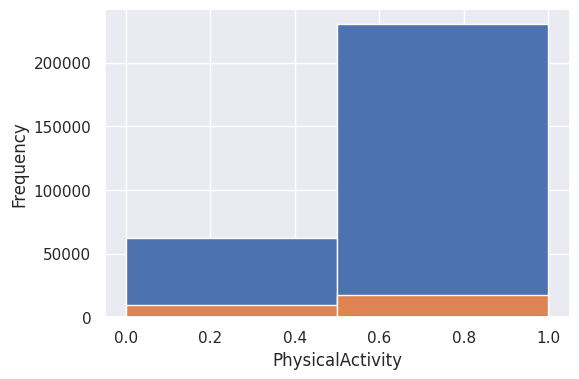

In [ ]:
# Análise da variável PhysicalActivity
fig, ax = plt.subplots(figsize = (6,4))

ax.hist(df[df["HeartDisease"]== 0]["PhysicalActivity"], bins=2, label="No HeartDisease")
ax.hist(df[df["HeartDisease"]== 1]["PhysicalActivity"], bins=2, label="HeartDisease")

ax.set_xlabel("PhysicalActivity")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

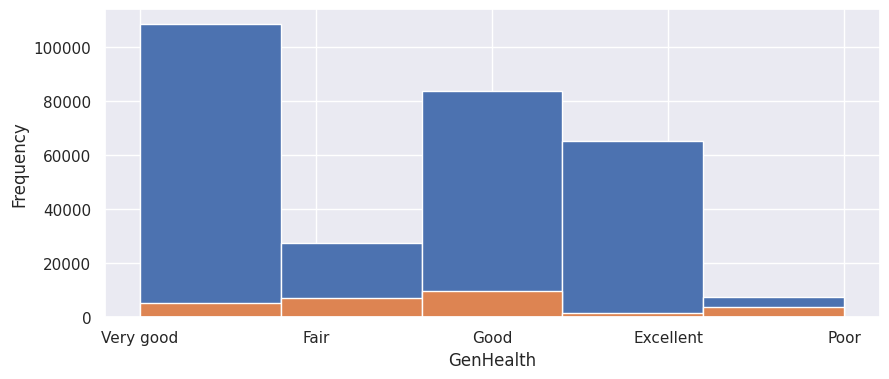

In [ ]:
#Análise da variável GenHealth
fig, ax = plt.subplots(figsize = (10,4))

ax.hist(df[df["HeartDisease"]== 0]["GenHealth"], bins=5, label="No HeartDisease")
ax.hist(df[df["HeartDisease"]== 1]["GenHealth"], bins=5, label="HeartDisease")

ax.set_xlabel("GenHealth")
ax.set_ylabel("Frequency")

Percebe-se que pessoas com melhor condições gerais de saúde tem menos chances de terem problemas cardíacos

Text(0, 0.5, 'Frequency')

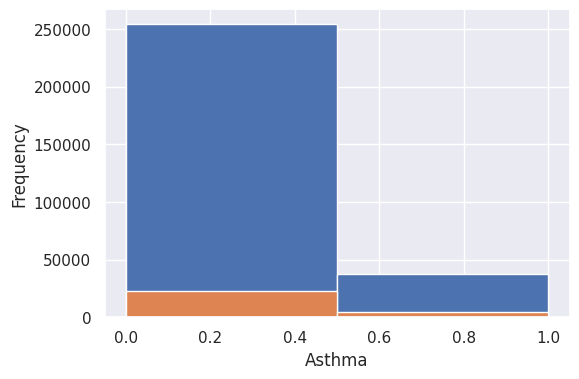

In [ ]:
# Análise da variável Asthma
fig, ax = plt.subplots(figsize = (6,4))

ax.hist(df[df["HeartDisease"]== 0]["Asthma"], bins=2, label="No HeartDisease")
ax.hist(df[df["HeartDisease"]== 1]["Asthma"], bins=2, label="HeartDisease")

ax.set_xlabel("Asthma")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

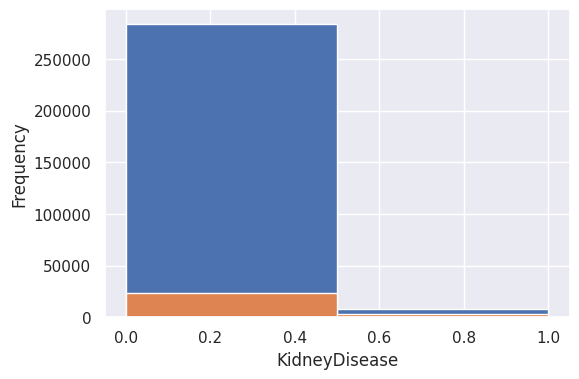

In [ ]:
# Análise da variável KidneyDisease
fig, ax = plt.subplots(figsize = (6,4))

ax.hist(df[df["HeartDisease"]== 0]["KidneyDisease"], bins=2, label="No HeartDisease")
ax.hist(df[df["HeartDisease"]== 1]["KidneyDisease"], bins=2, label="HeartDisease")

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

In [ ]:
# Análise da variável State.
# Esta vaariável apresenta uma grande quantidade de categorias (51), vejamos sua distribuição.

value_counts = df['State'].value_counts()
percentage = (value_counts / len(df)) * 100
print(percentage)

OH    2.010350
VA    2.005973
MS    2.000031
CA    1.995028
AZ    1.994403
ME    1.993465
MN    1.990650
OR    1.990338
TX    1.987211
TN    1.986898
MI    1.985647
ID    1.983458
IA    1.981895
NE    1.979393
FL    1.978455
WA    1.977204
AK    1.975015
SC    1.973139
AR    1.972514
OK    1.971263
NM    1.969074
DC    1.967198
MA    1.963758
NH    1.963133
NC    1.959380
CO    1.956253
VT    1.955941
NJ    1.955315
ND    1.953439
RI    1.952501
IN    1.951563
MT    1.949374
AL    1.946872
LA    1.945934
KY    1.945309
WV    1.944371
NY    1.944058
WI    1.942182
PA    1.942182
DE    1.941244
NV    1.939367
MD    1.939367
MO    1.937804
UT    1.934677
GA    1.930924
SD    1.929048
HI    1.928423
KS    1.927797
CT    1.923420
WY    1.918729
IL    1.909035
Name: State, dtype: float64


Text(0, 0.5, 'Frequency')

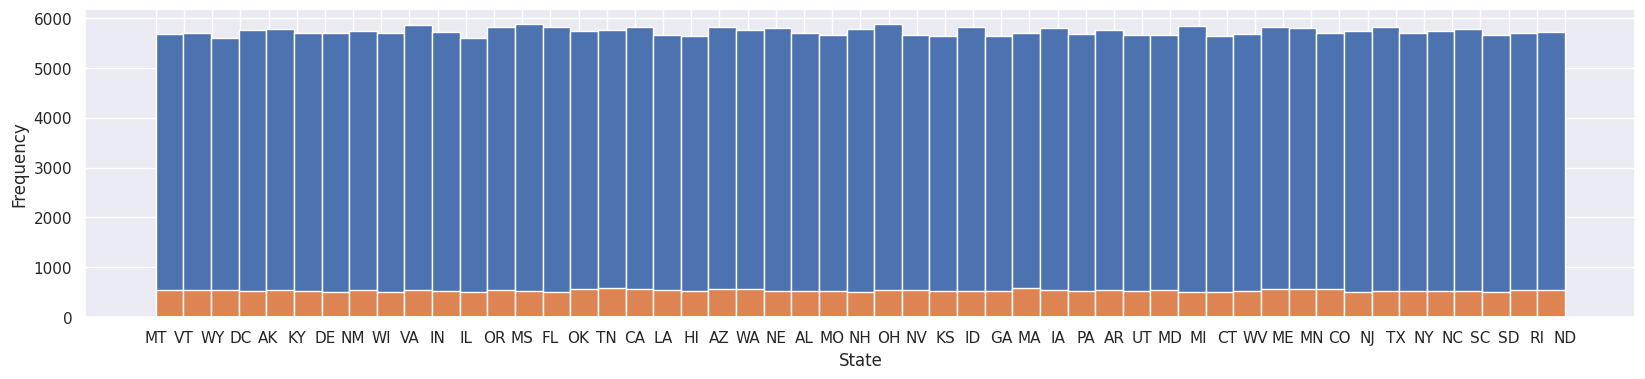

In [ ]:
fig, ax = plt.subplots(figsize = (20,4))

ax.hist(df[df["HeartDisease"]== 0]["State"], bins=51, label="No HeartDisease")
ax.hist(df[df["HeartDisease"]== 1]["State"], bins=51, label="HeartDisease")

ax.set_xlabel("State")
ax.set_ylabel("Frequency")

Considerando que a variável State possui uma distribuição de observações quase homogênea em todos as categorias e que a incidência de doenças cardíacas também é quase homogênea em todas as categorias, aparentemente esta variável não agrega informações ao modelo, portanto iremos excluí-la.

In [ ]:
df.drop('State', axis=1, inplace=True)

Análise exploratória das variáveis numéricas

<Axes: xlabel='BMI'>

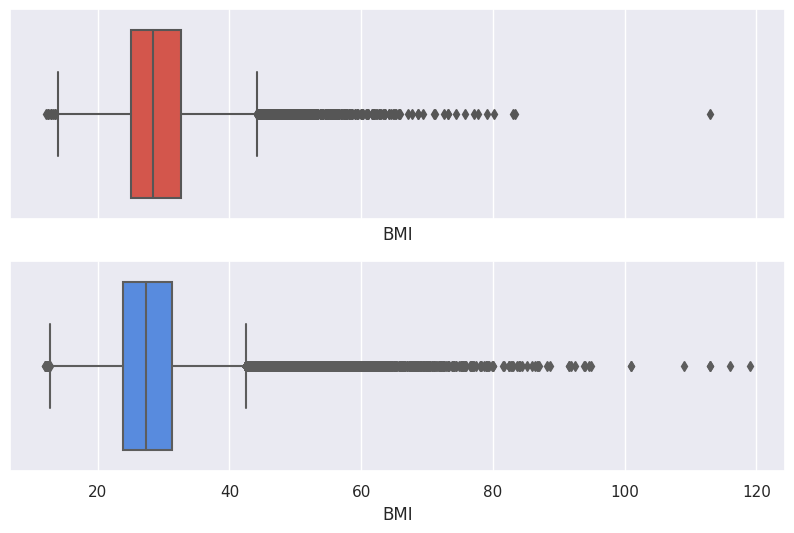

In [ ]:
# Análise da variável BMI
sns.set(rc={'figure.figsize':(10,6)})
f, (ax_box1, ax_box2) = plt.subplots(2, sharex=True)
sns.boxplot(x=df[df['HeartDisease']== 1]["BMI"], ax=ax_box1, color="#ea4335")
sns.boxplot(x=df[df['HeartDisease']== 0]["BMI"], ax=ax_box2, color='#4285f4')

Aparentemente, de acordo com as posições dos quartis no eixo x, pessoas com maior BMI possuem maior tendência a terem doenças cardíacas

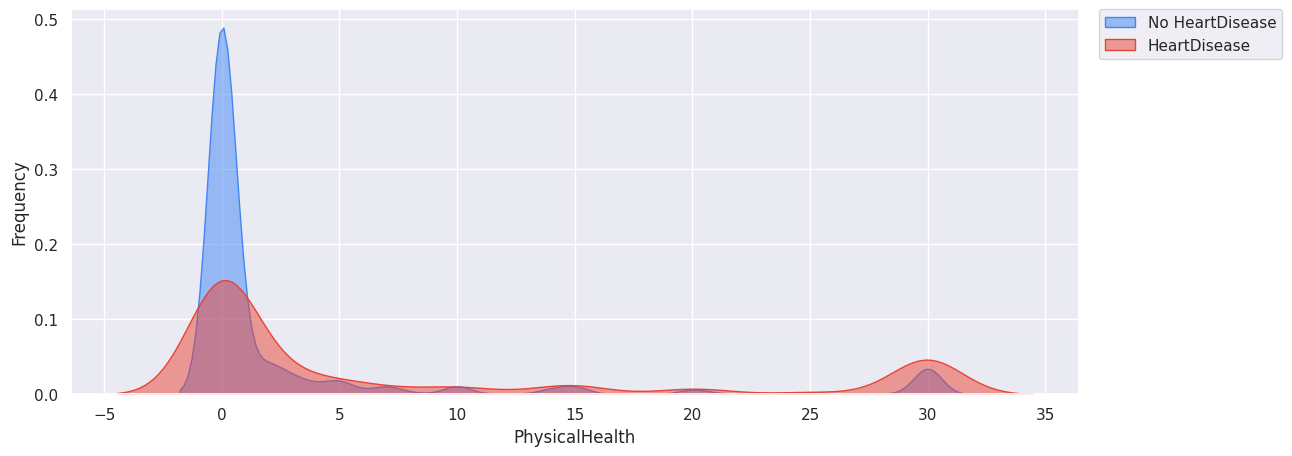

In [ ]:
#Análise da variável PhysicalHealth
#O uso de boxplot não proporcionou uma boa distribuição desta variável, portanto optamos pela utilização do KDE plot.
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]== 0]["PhysicalHealth"], alpha=0.5,fill = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]== 1]["PhysicalHealth"], alpha=0.5,fill = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()


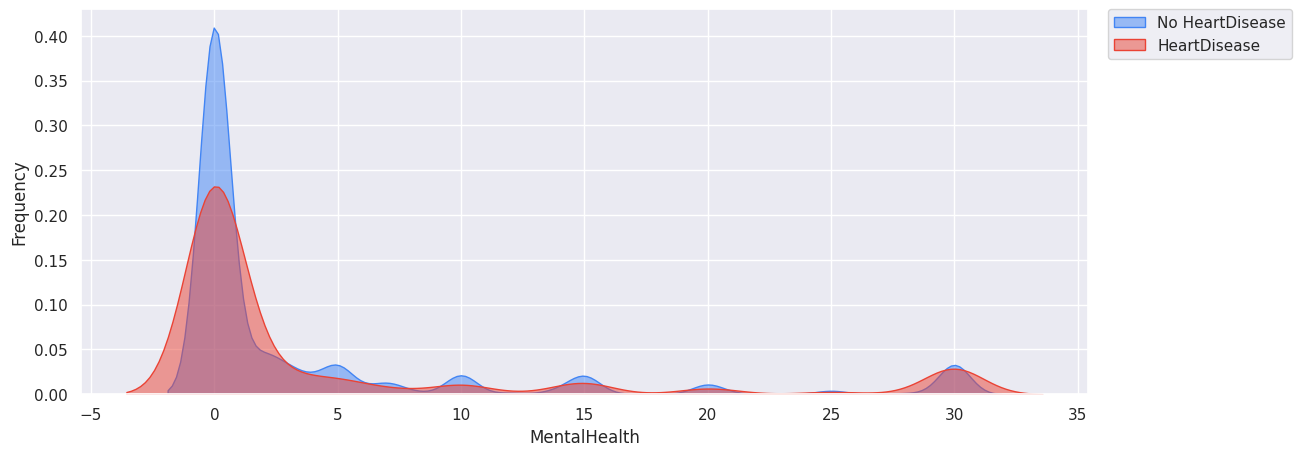

In [ ]:
#Análise da variável MentalHealth
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]== 0]["MentalHealth"], alpha=0.5, fill = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]== 1]["MentalHealth"], alpha=0.5, fill = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

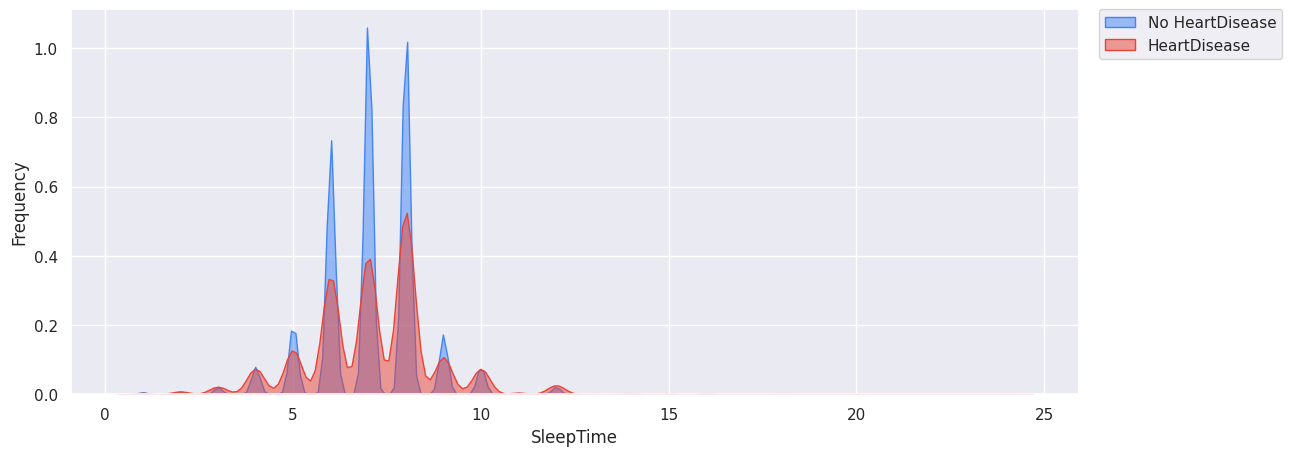

In [ ]:
#Análise da variável SleepTime
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]== 0]["SleepTime"], alpha=0.5, fill = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]== 1]["SleepTime"], alpha=0.5, fill = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

# Correlação entre as variáveis

<ipython-input-120-e2a7c1ca846f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr().round(2)


<Axes: >

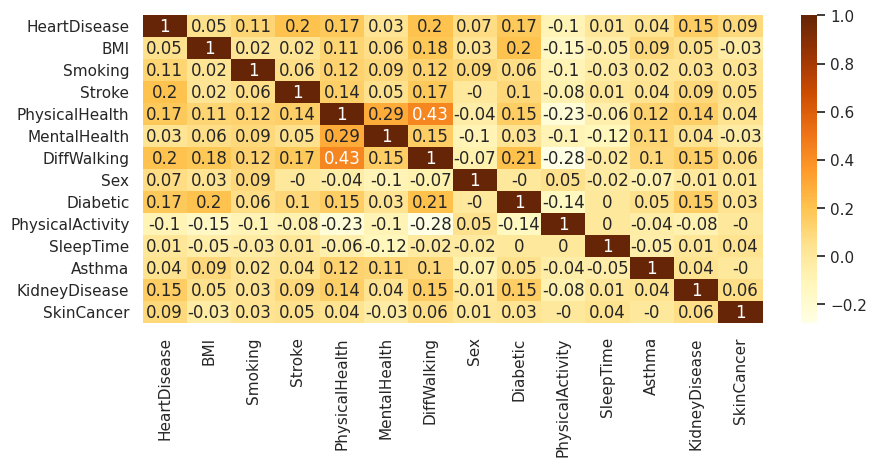

In [ ]:
correlation = df.corr().round(2)
plt.figure(figsize = (10,4))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

As variáveis que apresentam maior correlação com a variável alvo são: Stroke (fato da pessoa ter previamente AVC), saúde física, dificuldade para andar, diabetes e doenças no fígado.

# Divisão do dataset em treino e teste

In [ ]:
# Considerando que há uma grande quantidade de observações, iremos utilizar a divisão do dataset em 80% para treino e 20% para teste.
features = df.drop(columns =['HeartDisease'], axis = 1)

target = df['HeartDisease']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (255836, 16)
Shape of testing feature: (63959, 16)
Shape of training label: (255836,)
Shape of testing label: (63959,)


# Encoding das variáveis categóricas que possuem mais de duas categorias.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   Stroke            319795 non-null  float64
 4   PhysicalHealth    319795 non-null  float64
 5   MentalHealth      319795 non-null  float64
 6   DiffWalking       319795 non-null  int64  
 7   Sex               319795 non-null  int64  
 8   AgeCategory       319795 non-null  object 
 9   Race              319795 non-null  object 
 10  Diabetic          319795 non-null  int64  
 11  PhysicalActivity  319795 non-null  int64  
 12  GenHealth         319795 non-null  object 
 13  SleepTime         319795 non-null  float64
 14  Asthma            319795 non-null  int64  
 15  KidneyDisease     319795 non-null  int64  
 16  SkinCancer        31

In [ ]:
df.nunique()

HeartDisease           2
BMI                 3609
Smoking                2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           14
Race                   6
Diabetic               2
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

As variáveis que ainda precisam ser codificadas são:
AgeCategory, Race, GenHealth. Considerando que estas variáveis não possuem um número significativo de categorias, vamos utilizar a técnica One Hot Encoding.


In [ ]:
# Criar uma instância do ColumnTransformer
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['AgeCategory', 'Race', 'GenHealth']),
    remainder='passthrough')

# Transformar X_train
transformed_train = transformer.fit_transform(X_train)
transformed_train_data = pd.DataFrame(transformed_train, columns=transformer.get_feature_names_out())

transformed_train_data.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([transformed_train_data, X_train], axis=1)

X_train.drop(['AgeCategory', 'Race', 'GenHealth'], axis=1, inplace=True)

# Transformar X_test
transformed_test = transformer.transform(X_test)
transformed_test_data = pd.DataFrame(transformed_test, columns=transformer.get_feature_names_out())

transformed_test_data.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([transformed_test_data, X_test], axis=1)

X_test.drop(['AgeCategory', 'Race', 'GenHealth'], axis=1, inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Data standardization
Optei por utlizar a técnica de standardization porque o dataset possui muitas variáveis categóricas, que foram transformadas em dados numéricos. A utilização de normalização poderia prejudicar a relação da variável target com as variáveis categóricas.

In [ ]:
scaler = StandardScaler()

#training data
X_train = scaler.fit_transform(X_train)

#test data
X_test = scaler.fit_transform(X_test)

#Criação das métricas de avaliação
Iremos utilizar métodos de validação mais indicados para avaliação de modelos preditivos de classificação binária.



In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Variáveis de predição do test data
    y_pred = model.predict(x_test)

    # Cáculo da accuracy, precision, recall, f1-score e kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Cálculo da área ubaixo da ROC curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

# Criação dos modelos de aprendizagem supervisionada
Optei por testar três modelos de aprendizagem supervisionada indicados para predição de classificação binária, são eles:

K-Nearest Neighbors

Decision Tree

Logistic Regression

In [ ]:
# Criação do modelo K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

# Avaliação do modelo
knn_eval = evaluate_model(knn, X_test, y_test)

print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9055175972107131
Precision: 0.3626323055683387
Recall: 0.144693352919574
F1 Score: 0.20685129282058015
Cohens Kappa Score: 0.16636150691759766
Area Under Curve: 0.7187573987139808
Confusion Matrix:
 [[57128  1385]
 [ 4658   788]]


In [ ]:
# Criação do modelo Decision Tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Avaliação do modelo
clf_eval = evaluate_model(clf, X_test, y_test)

print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])

Accuracy: 0.8648352851045201
Precision: 0.2315824802819265
Recall: 0.2533969886154976
F1 Score: 0.24199912319158265
Cohens Kappa Score: 0.16796617476699727
Area Under Curve: 0.5889481926540815
Confusion Matrix:
 [[53934  4579]
 [ 4066  1380]]


In [ ]:
#Criação do modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Avaliação do modelo
clf_eval = evaluate_model(clf, X_test, y_test)

print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])



Accuracy: 0.8648352851045201
Precision: 0.2315824802819265
Recall: 0.2533969886154976
F1 Score: 0.24199912319158265
Cohens Kappa Score: 0.16796617476699727
Area Under Curve: 0.5889481926540815
Confusion Matrix:
 [[53934  4579]
 [ 4066  1380]]


Percebe-se que os resultados da avaliação do modelo Decision Tree e Regressão Logística apresentaram resultados idênticos. Assim seguiremos adiante com a comparação dos modelos K-Nearest Neighbor e Decision Tree

# Comparação entre os modelos

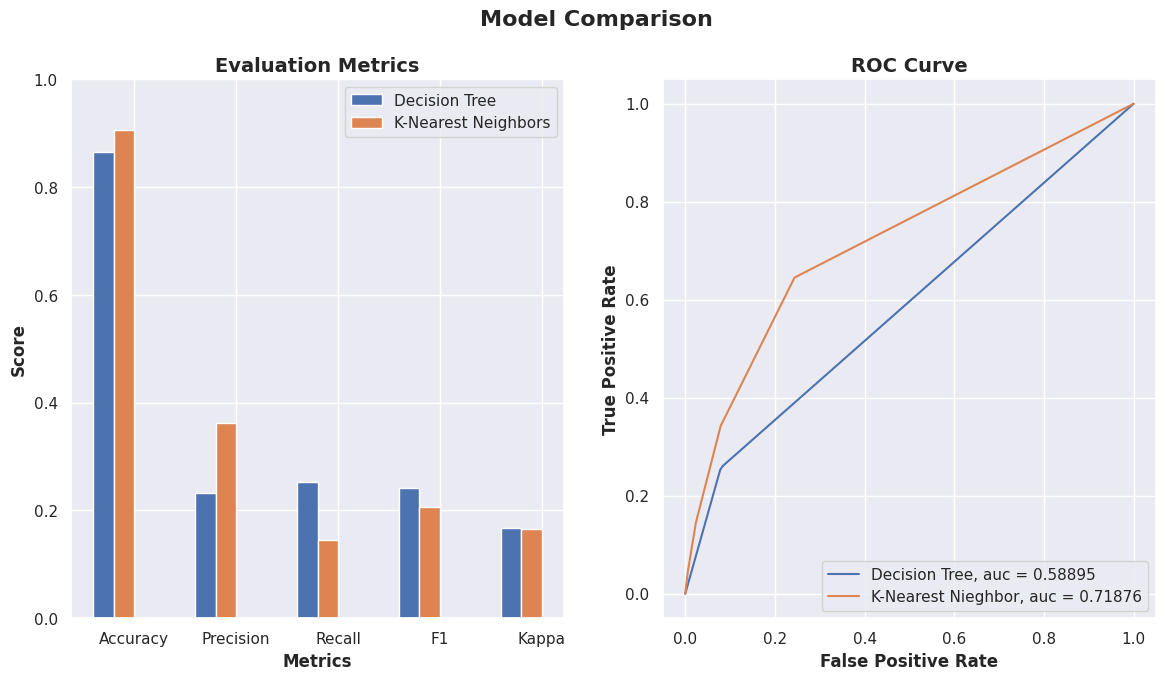

In [ ]:
# Criação dos plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# Primeiro plot - Barras paralelas
barWidth = 0.2
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]


## Posição de início do eixo X
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]

## Adicionando os dados ao plot
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configurando eixos x e y
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Criando o título e legendas
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Segundo Plot - ROC Curve
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configurando eixos x e y
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Criando o título e legendas
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

# Conclusões

Os dois modelos apresentaram alto nível de acurária, porém baixos niveis nos demais indicadores como precisão, recall, F1 e Kappa. Isso provavelmente se deve ao dataset estar desbalanceado, com alto volume de pessoas saudáveis, logo o nível de acurácia naturalmente será alto para qualquer modelo. Infelizmente isto prejudica o resultado final do modelo, impactando os demais indicadores que são mais relevantes do que a acarácia neste caso.

O indicador de precisão se mostrou melhor no modelo KNN demonstrando uma maior capacidade de indicar corretamente as predições em relação a todas as predições que indicou como positivas, ou seja, indica menos falsos positivos (Erro tipo 1).

Ja o indicador recall se mostrou melhor no modelo Decision Tree, indicando que este modelo tem maior capacidade de indicar corretamente as predições em relação ao total de observações, ou seja, acerta mais predições positivas, indica menos falsos negativos, porém também indica mais falsos positivos (Erro tipo 2).

O balanço entre os dois indicadores pode ser dado pelo indicador F1, que tem um melhor indice no modelo Decision Tree, assim este modelo seria o mais indicado para utilização. Todavia, como era esperado, o modelo KNN apresenta um melhor indicador AUC, ou seja, tem uma melhor relaçao entre TP e FP.

Considerando o contexto do problema, acredito ser melhor ter um indicador que apresenta mais indicações positivas em geral, mesmo apresentando também mais falsos positivos, pois se uma pessoa tem tendência a ter problemas cardíacos é mais vantajoso para ela saber disso, mesmo que seja uma informação possivelmente falsa (FP), em relação ao risco da pessoa possuir problemas cardíacos e o modelo identificar que ela não possui (FN).

Eu, se tivesse pretensão a ter problemas cardícamos iria preferir o modelo que acerta mais na previsão positiva, mesmo que exista um risco maior que esta provisão não esteja correta, em detrimento de um modelo no qual o risco de não identificar meu problema e indicar que não possuo problema algum seja maior.

Entretanto, considerando que ambos os modelos apresentam um nível baixo de precisão e recall, acredito que ambos os algoritmos ainda precisam ser reformulados para serem confiáveis, talvez para futuras tentativas podem ser usadas ténicas de resampling visando aumentar os níveis dos indicadores de precisão e recall.



